In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv('https://raw.githubusercontent.com/GauravPadawe/Framingham-Heart-Study/master/framingham.csv')

In [3]:
# heart2 = pd.DataFrame(heart, columns = [ '0' , 'male' , 'age'  ,'education' , 'currentSmoker'  ,'cigsPerDay' , 'BPMeds,','prevalentStroke','prevalentHyp' , 'diabetes'  , 'totChol' ,'sysBP',  'diaBP' ,   'BMI',  'heartRate' , 'glucose' , 'TenYearCHD' ], dtype = float )

In [4]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:

heart.info()

#the ds has 4240 persons x 16 columns
# there are too much missing information on the glucose. let's clean it a the NA now


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [10]:
heart.isnull().sum() / 4240 * 100 

#percentage of null values
# lets fill the NA with the average

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [7]:
heart['glucose'] = heart['glucose'].fillna(heart['glucose'].median())
heart['education'] = heart['education'].fillna(heart['education'].median())
heart['BPMeds'] = heart['BPMeds'].fillna(heart['BPMeds'].median())
heart['totChol'] = heart['totChol'].fillna(heart['totChol'].median())
heart['BMI'] = heart['BMI'].fillna(heart['BMI'].median())
heart['heartRate'] = heart['heartRate'].fillna(heart['heartRate'].median())


In [9]:
for avg in heart['cigsPerDay'].where(heart['currentSmoker'] ==1):
    avg = heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean())
heart['cigsPerDay'] = heart['cigsPerDay'].fillna(0)
#heart['cigsPerDay'].median()

In [12]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

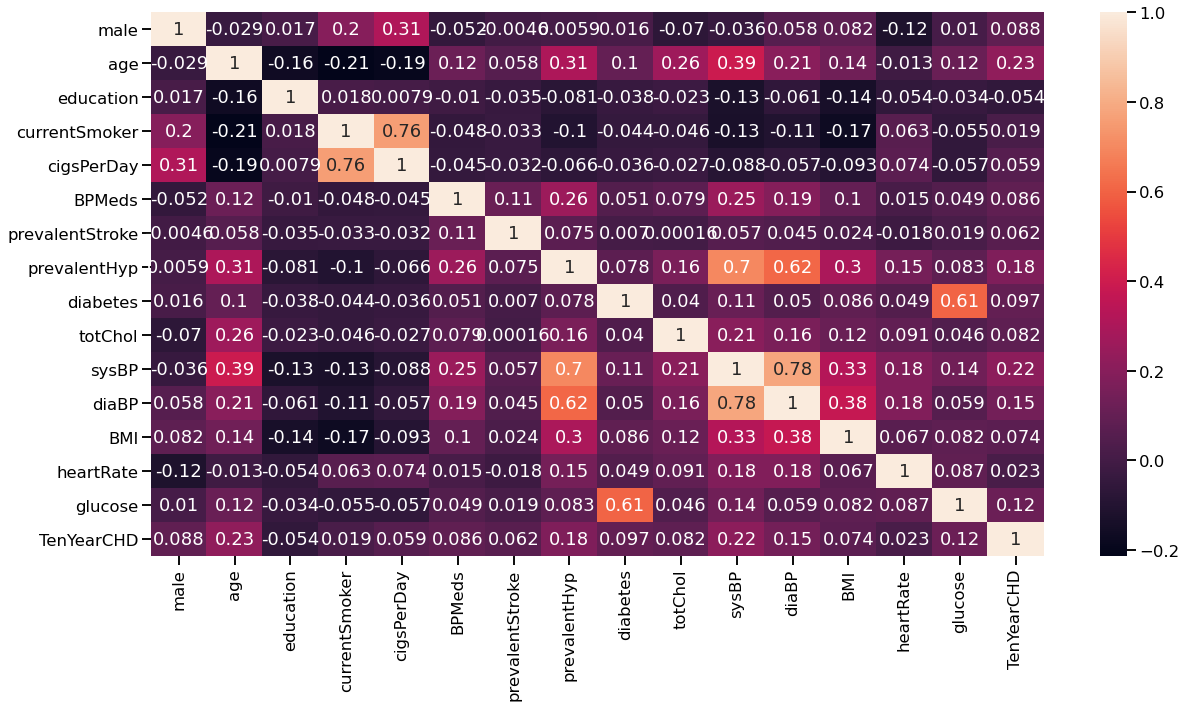

In [16]:
# data correlation

## the squares in orange indicated that there is a correlation between the variables.

plt.figure(figsize=(20,10))

sns.heatmap(heart.corr(), annot=True)

Text(0.5, 1.0, 'Age distribution of the patients')

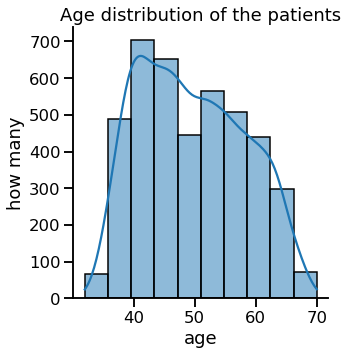

In [27]:
sns.displot(heart['age'], bins=10, kde=True) #kde plot the average along the esp data
plt.ylabel('how many')
plt.title('Age distribution of the patients')

In [28]:
# after i want to apply some ML to predict the chances to have a stroke